<a href="https://colab.research.google.com/github/Walidcorloene/PlotingData/blob/main/PlotingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('drive/')

Mounted at drive/


In [ ]:
os.chdir('drive/MyDrive/computer science/Energie')

FileNotFoundError: ignored

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/computer science/Energie/data/energy_use_in_the_UK.csv',delimiter=";")
df.head(10)

,timestamp,coal,nuclear,wind,hydro,solar
0,2012-01-01 00:00:01,8693,7121,2740,728,0.0
1,2012-01-01 00:05:06,8650,7120,2812,732,0.0
2,2012-01-01 00:10:01,8880,7125,2896,744,0.0
3,2012-01-01 00:15:01,9111,7122,2964,748,0.0
4,2012-01-01 00:20:01,9195,7114,2992,750,0.0
5,2012-01-01 00:25:10,9270,7090,3040,751,0.0
6,2012-01-01 00:30:01,9164,7060,3050,751,0.0
7,2012-01-01 00:35:05,8999,7034,3059,751,0.0
8,2012-01-01 00:40:14,8887,7004,3085,751,0.0
9,2012-01-01 00:45:01,8879,6982,3100,751,0.0


In [ ]:
#Pour connaitre le nom des colonnes 
df.columns

Index([' timestamp', ' coal', ' nuclear', ' wind', ' hydro', ' solar'], dtype='object')

In [ ]:
#enlever les espaces dans le nom des colonnes
df.columns = df.columns.str.strip()

In [ ]:
#avoir les dates de timestamp dans dates
dates = pd.to_datetime(df["timestamp"])

In [ ]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [ ]:
df = df.set_index("timestamp")

In [ ]:
df.head()

,coal,nuclear,wind,hydro,solar
timestamp,,,,,
2012-01-01 00:00:01,8693,7121,2740,728,0.0
2012-01-01 00:05:06,8650,7120,2812,732,0.0
2012-01-01 00:10:01,8880,7125,2896,744,0.0
2012-01-01 00:15:01,9111,7122,2964,748,0.0
2012-01-01 00:20:01,9195,7114,2992,750,0.0


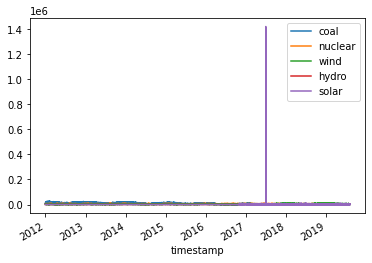

In [ ]:
df.plot()




##Coal



In [ ]:
df["coal"].replace({0 : np.nan}, inplace=True)

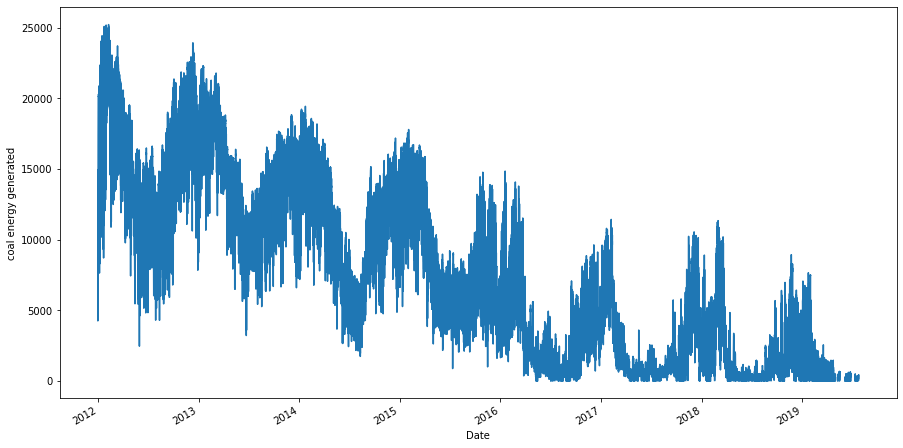

In [ ]:
df['coal'].plot(figsize=(15,8))
plt.xlabel('Date')
plt.ylabel('coal energy generated')
plt.show()



##Nuclear



In [ ]:
df["nuclear"].clip(lower=3000, inplace=True)

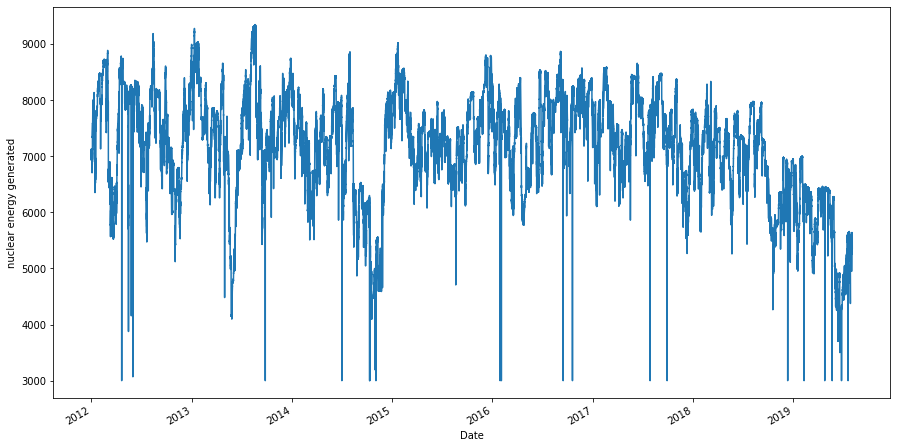

In [ ]:
df['nuclear'].plot(figsize=(15,8))
plt.xlabel('Date')
plt.ylabel('nuclear energy generated')
plt.show()



##WIND




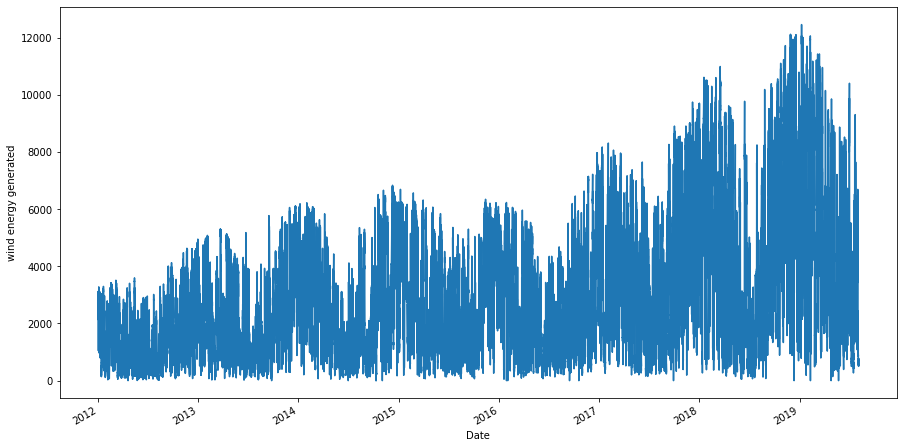

In [ ]:
df['wind'].plot(figsize=(15,8))
plt.xlabel('Date')
plt.ylabel('wind energy generated')
plt.show()



##Hydro


In [ ]:
df["hydro"].replace({0 : np.nan}, inplace=True)

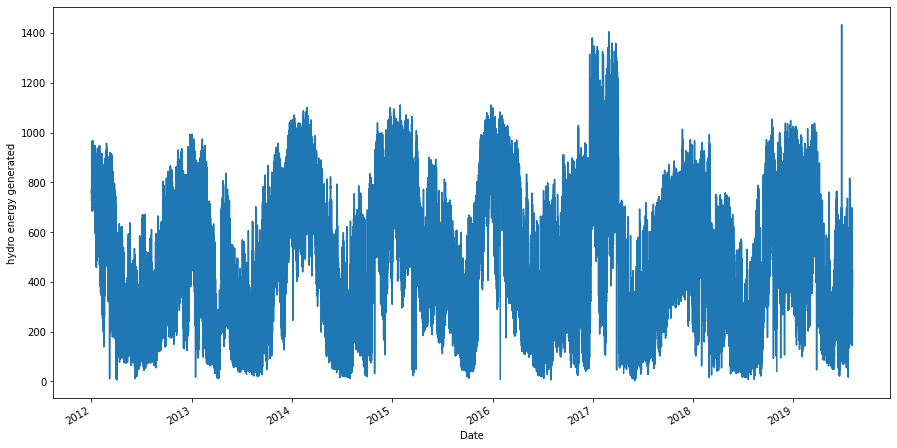

In [ ]:
df['hydro'].plot(figsize=(15,8))
plt.xlabel('Date')
plt.ylabel('hydro energy generated')
plt.show()



##Solar



In [ ]:
#les 10 dernières valeur de la liste
np.sort(df["solar"].values)[-10:]

array([   9190.,    9200.,    9310.,    9310.,    9310.,    9630.,
          9630.,    9630., 1420000., 1420000.])

In [ ]:
df["solar"].clip(upper = 9630, inplace=True)

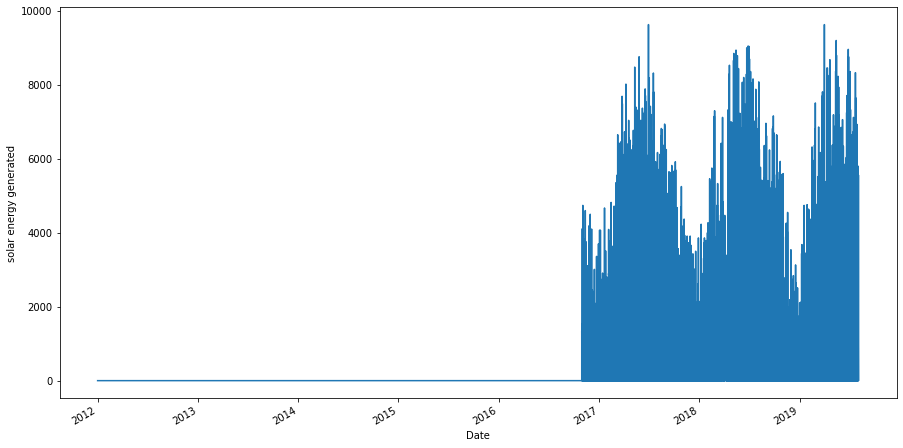

In [ ]:
df['solar'].plot(figsize=(15,8))
plt.xlabel('Date')
plt.ylabel('solar energy generated')
plt.show()


In [ ]:
solar = df[["solar"]].copy()

In [ ]:
df_without_solar = df.drop(columns=["solar"])

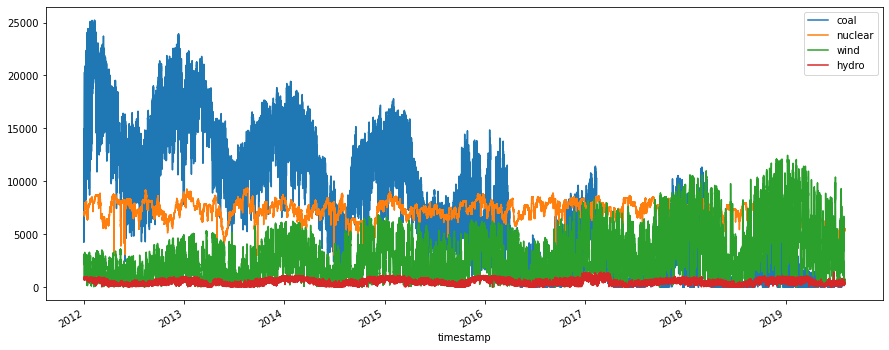

In [ ]:
df_without_solar.plot(figsize=(15,6))

In [ ]:
#pour calculer l'energie par jour (D) en utilisant resample 
df_without_solar_per_day = 24*12*df_without_solar.resample("D").mean()

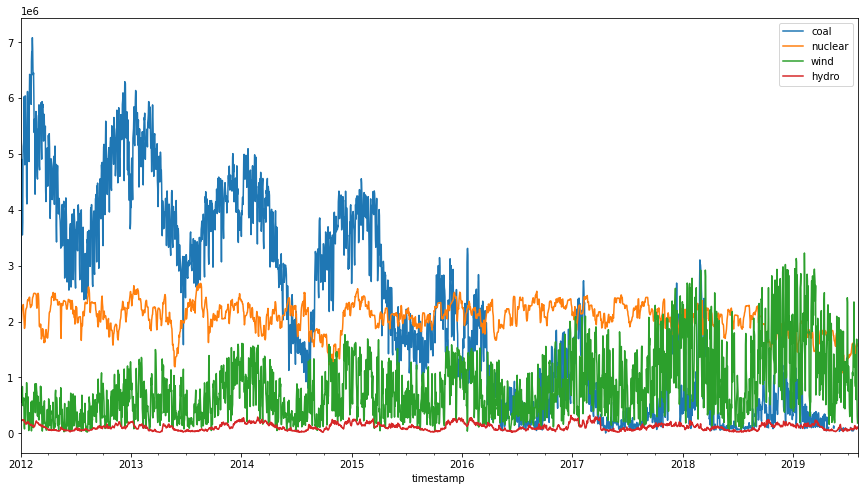

In [ ]:
df_without_solar_per_day.plot(figsize=(15,8))

In [ ]:
#interpolate
df_without_solar_per_day.interpolate('linear', inplace=True)

In [ ]:
start_date = "2017-01-01"
solar= solar[solar.index >= start_date]

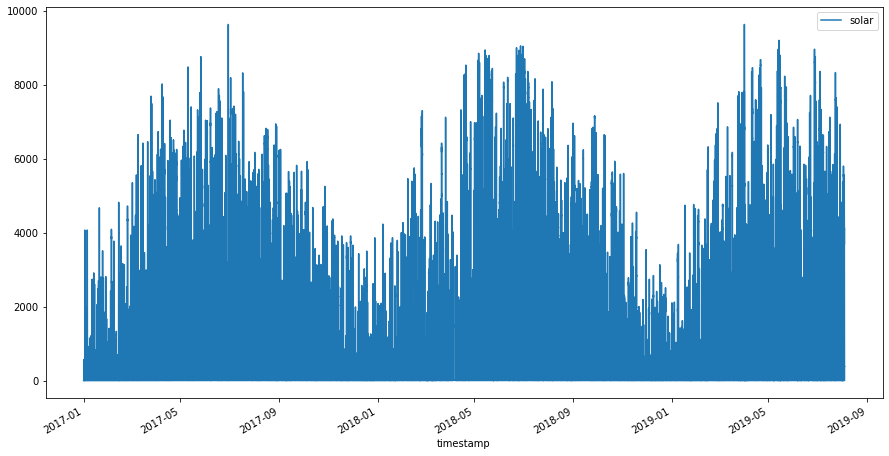

In [ ]:
solar.plot(figsize=(15,8))

In [ ]:
solar_per_day = 24*12*solar.resample("D").mean()

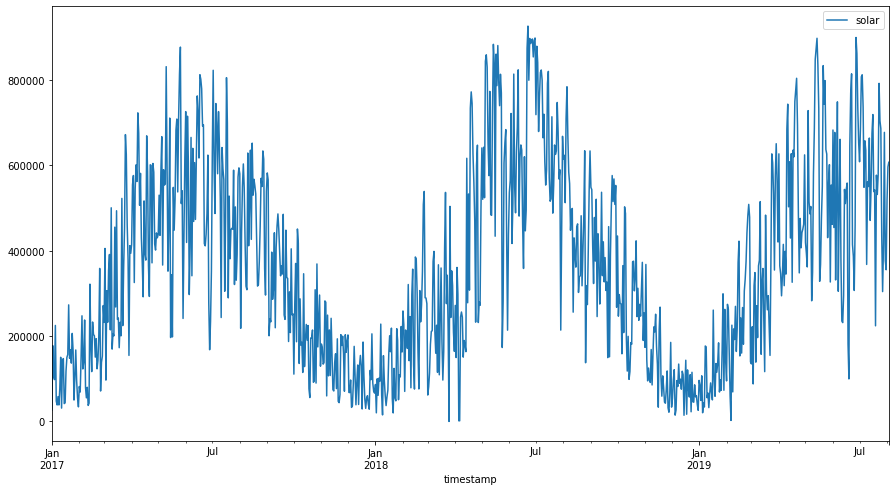

In [ ]:
solar_per_day.plot(figsize=(15,8))

In [ ]:
solar.to_csv('./solar.csv')
solar_per_day.to_csv('./solar_per_dar.csv')